3.1 Warming Up Exercises - Basic Inspection and Exploration

Problem 1 - Data Read, Write and Inspect

1. Load the provided dataset and import in pandas DataFrame:

In [ ]:
import pandas as pd
file_path = r"/content/drive/MyDrive/datasets/bank .csv"
bank_df = pd.read_csv(file_path)
bank_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


2. Check info of the DataFrame and identify:

In [ ]:
#check Dataframe info
print(bank_df.info())
# (a) Columns  with dtypes = objects
object_columns = bank_df.select_dtypes(include='object').columns.tolist()
print("Object Columns: ", object_columns)


#b Unique value of those columns
unique_values = {col: bank_df[col].unique() for col in object_columns}
print("Unique Value :", unique_values)

# (c) check for the total number of null values in each column
null_values= bank_df.isnull().sum()
print("Null Values per Column:", null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
Object Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'mon

3. Drop all the columns with dtypes object and store in new DataFrame:

In [ ]:
# Drop object columns
bank_numeric_df = bank_df.drop(columns=object_columns)

# Write the DataFrame to a new CSV
bank_numeric_df.to_csv('banknumericdata.csv', index=False)


4. Read banknumericdata.csv and find the summary statistics:

In [ ]:
# Read the new CSV
bank_numeric_df = pd.read_csv('banknumericdata.csv')

# Summary statistics
summary_statistics = bank_numeric_df.describe()
print("Summary Statistics:\n", summary_statistics)


Summary Statistics:
                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

Problem 2 - Data Imputations

1. Load the provided dataset and import in pandas DataFrame:

In [ ]:
# Load the dataset
medical_df = pd.read_csv('/content/drive/MyDrive/datasets/medical_students_dataset.csv')
medical_df.head(6)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes


2. Check info of the DataFrame and identify column with missing (null) values:


In [ ]:
# Check DataFrame info
print(medical_df.info())

# Identify columns with missing values
missing_values = medical_df.isnull().sum()
print("Missing Values:", missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Missing Values: Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood

3. Fill the missing values using various techniques:


4. Check for any duplicate values present in Dataset:

In [ ]:
# Check for duplicates
duplicates = medical_df.duplicated().sum()
print("Duplicate Rows:", duplicates)

# Drop duplicates if any
if duplicates > 0:
    medical_df.drop_duplicates(inplace=True)


Duplicate Rows: 7644


3.2 Exercises - Data Cleaning and Transformations with Titanic Dataset

Dataset Used: titanic.csv


Problem 1

Create a DataFrame for specific columns:

In [ ]:
# Load the Titanic dataset
titanic_df = pd.read_csv('/content/drive/MyDrive/datasets/Titanic-Dataset.csv')

# Subset the DataFrame
titanic_subset = titanic_df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
titanic_first_class = titanic_subset[titanic_subset['Pclass'] == 1]

# Calculate mean, median, max, and min of 'Fare'
mean_fare = titanic_first_class['Fare'].mean()
median_fare = titanic_first_class['Fare'].median()
max_fare = titanic_first_class['Fare'].max()
min_fare = titanic_first_class['Fare'].min()

print(f"Mean Fare: {mean_fare}, Median Fare: {median_fare}, Max Fare: {max_fare}, Min Fare: {min_fare}")


Mean Fare: 84.1546875, Median Fare: 60.287499999999994, Max Fare: 512.3292, Min Fare: 0.0


Problem 2

Check for null values in the ‘Age’ column and drop them:

In [ ]:
# Check for null values in 'Age'
null_age_count = titanic_first_class['Age'].isnull().sum()
print("Null values in 'Age':", null_age_count)

# Drop null values
titanic_first_class.dropna(subset=['Age'], inplace=True)


Null values in 'Age': 30


<ipython-input-41-23a9ca861694>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_first_class.dropna(subset=['Age'], inplace=True)


Problem 3

One-hot encoding for the ‘Embarked’ column:

In [ ]:
# One-hot encoding
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# Add these new columns to the original DataFrame
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

# Drop the original 'Embarked' column
titanic_df.drop(columns=['Embarked'], inplace=True)

# Print the first few rows
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem 4

Compare mean survival rates by gender:

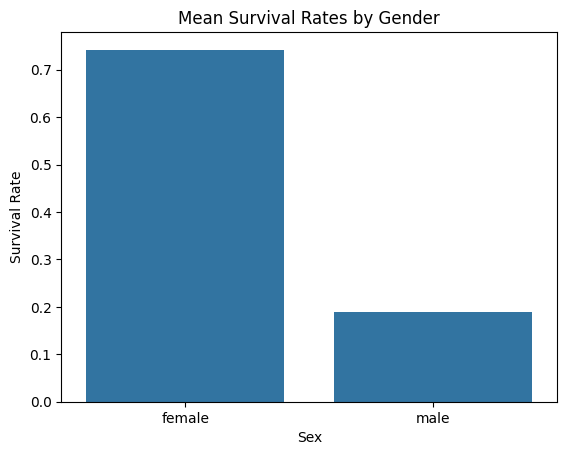

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mean survival rates by gender
mean_survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()

# Visualization
sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values)
plt.title('Mean Survival Rates by Gender')
plt.ylabel('Survival Rate')
plt.show()


Problem 5

Visualization by port of embarkation:

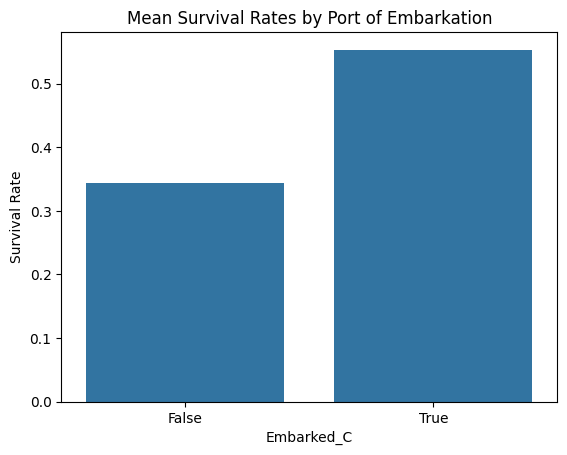

In [ ]:
# Mean survival rates by port of embarkation
mean_survival_by_port = titanic_df.groupby('Embarked_C')['Survived'].mean()

# Visualization
sns.barplot(x=mean_survival_by_port.index, y=mean_survival_by_port.values)
plt.title('Mean Survival Rates by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()


Problem 6 (Optional)

Survival rates by age group and passenger class:

<ipython-input-45-a6a8d3248199>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_age_class = titanic_df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


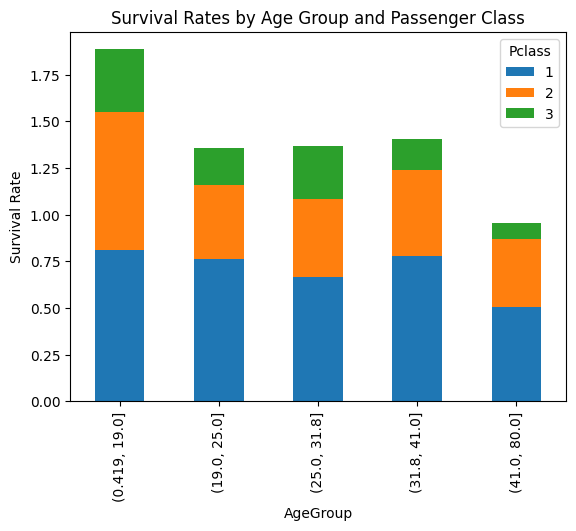

In [ ]:
# Create age groups
titanic_df['AgeGroup'] = pd.qcut(titanic_df['Age'], 5)

# Mean survival rates by age group and class
mean_survival_by_age_class = titanic_df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()

# Visualization
mean_survival_by_age_class.plot(kind='bar', stacked=True)
plt.title('Survival Rates by Age Group and Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
